#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 


## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')



In [2]:
#Load features of stored dataset as dataframe

file_path = r"R:\HuB\ESPERANTO\Data_Science\MachineLearningEndToEndProject\Classification\Wafer Fault Detection\notebook\data\wafer_23012020_041211.csv"
df=pd.read_csv(file_path)
print('Shape of df is:',df.shape)
df.head()

Shape of df is: (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
df.columns


Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [4]:
df.drop(columns=['Unnamed: 0','Good/Bad']).iloc[:100].to_csv('test.csv',index=False)

In [5]:
df['wafers']=df['Unnamed: 0']

In [6]:
df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586', 'Sensor-587',
       'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad', 'wafers'],
      dtype='object', length=593)

In [7]:
df.rename(columns={'Unnamed: 0': 'Wafers'},inplace=True )

In [8]:
df.drop(columns='wafers',axis=1 , inplace=True)

In [9]:
df.columns

Index(['Wafers', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5',
       'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [10]:
#Train_test_split
from sklearn.model_selection import train_test_split 
train_df , test_df = train_test_split(df,test_size=.27 , random_state=85 )

In [11]:
train_df.head()

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
38,Wafer-839,3043.78,2522.76,2192.0000,2085.6871,1.1723,100.0,94.9300,0.1238,1.4463,...,NaN,0.5032,0.0149,0.0038,2.9656,0.0473,0.0280,0.0087,59.0825,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
48,Wafer-849,3030.23,2568.32,2196.0000,1230.0293,0.7684,100.0,97.5578,0.1219,1.4411,...,NaN,0.4981,0.0136,0.0034,2.7329,0.0147,0.0095,0.0028,65.0365,-1
73,Wafer-874,2825.67,2286.09,2210.2778,2120.5760,1.0700,100.0,95.1089,0.1230,1.3947,...,NaN,0.4974,0.0171,0.0049,3.4382,0.0218,0.0054,0.0020,24.6547,-1
77,Wafer-878,3086.05,2417.34,2216.5000,1111.5436,0.8373,100.0,99.9867,0.1205,1.4678,...,101.3876,0.5007,0.0099,0.0027,1.9719,0.0187,0.0190,0.0053,101.3876,-1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 38 to 32
Columns: 592 entries, Wafers to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 338.2+ KB


In [13]:
train_df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,72.000000,73.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,73.000000,73.000000,...,28.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,3015.304306,2485.275342,2200.458036,1485.568439,1.189814,100.0,97.634111,0.122340,1.449629,-0.000003,...,72.655214,0.499264,0.013299,0.003479,2.663768,0.024477,0.014759,0.004622,72.306166,-0.917808
std,69.948205,71.969613,31.700444,454.266370,0.344520,0.0,5.454175,0.002029,0.068080,0.010448,...,44.972741,0.003438,0.002961,0.000658,0.594908,0.012589,0.007300,0.002398,47.229394,0.399772
min,2825.670000,2254.990000,2114.666700,988.207100,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.008100,0.002400,1.618000,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2971.472500,2441.680000,2189.355600,1111.294025,0.858975,100.0,95.108900,0.120800,1.399700,-0.005400,...,44.937500,0.496900,0.011400,0.003100,2.284900,0.014000,0.009500,0.002800,33.787600,-1.000000
50%,3005.360000,2492.270000,2200.972250,1308.647900,1.166500,100.0,99.750000,0.122400,1.449300,0.000300,...,56.779300,0.499400,0.012700,0.003300,2.521400,0.021800,0.013500,0.003900,59.082500,-1.000000
75%,3070.052500,2528.500000,2214.413900,1942.306900,1.383000,100.0,101.457800,0.123850,1.495900,0.007500,...,95.481950,0.501500,0.014500,0.003800,2.899100,0.028100,0.019000,0.005700,101.387600,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.610700,0.025000,...,223.101800,0.508700,0.025100,0.005600,5.058200,0.054500,0.040100,0.015000,223.101800,1.000000


In [14]:
#sum=train_df[train_df.isna()].sum()
sum=train_df.isna().sum().sum()

In [15]:
## Check missing vals in dependent feature variables

train_df.isna().sum().sum() / (train_df.shape[0] * (train_df.shape[1] - 1))

0.04121178406694018

In [16]:
train_df.shape

(73, 592)

**=>** Almost 4% out of total cells we're having, are missing.

We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

## # Visualization of Sensors' distribution:

In [17]:
enumerate(train_df.columns[1:51])

In [18]:
for i,cols in enumerate(train_df.columns[1:51]):
    print({i:cols})

{0: 'Sensor-1'}
{1: 'Sensor-2'}
{2: 'Sensor-3'}
{3: 'Sensor-4'}
{4: 'Sensor-5'}
{5: 'Sensor-6'}
{6: 'Sensor-7'}
{7: 'Sensor-8'}
{8: 'Sensor-9'}
{9: 'Sensor-10'}
{10: 'Sensor-11'}
{11: 'Sensor-12'}
{12: 'Sensor-13'}
{13: 'Sensor-14'}
{14: 'Sensor-15'}
{15: 'Sensor-16'}
{16: 'Sensor-17'}
{17: 'Sensor-18'}
{18: 'Sensor-19'}
{19: 'Sensor-20'}
{20: 'Sensor-21'}
{21: 'Sensor-22'}
{22: 'Sensor-23'}
{23: 'Sensor-24'}
{24: 'Sensor-25'}
{25: 'Sensor-26'}
{26: 'Sensor-27'}
{27: 'Sensor-28'}
{28: 'Sensor-29'}
{29: 'Sensor-30'}
{30: 'Sensor-31'}
{31: 'Sensor-32'}
{32: 'Sensor-33'}
{33: 'Sensor-34'}
{34: 'Sensor-35'}
{35: 'Sensor-36'}
{36: 'Sensor-37'}
{37: 'Sensor-38'}
{38: 'Sensor-39'}
{39: 'Sensor-40'}
{40: 'Sensor-41'}
{41: 'Sensor-42'}
{42: 'Sensor-43'}
{43: 'Sensor-44'}
{44: 'Sensor-45'}
{45: 'Sensor-46'}
{46: 'Sensor-47'}
{47: 'Sensor-48'}
{48: 'Sensor-49'}
{49: 'Sensor-50'}


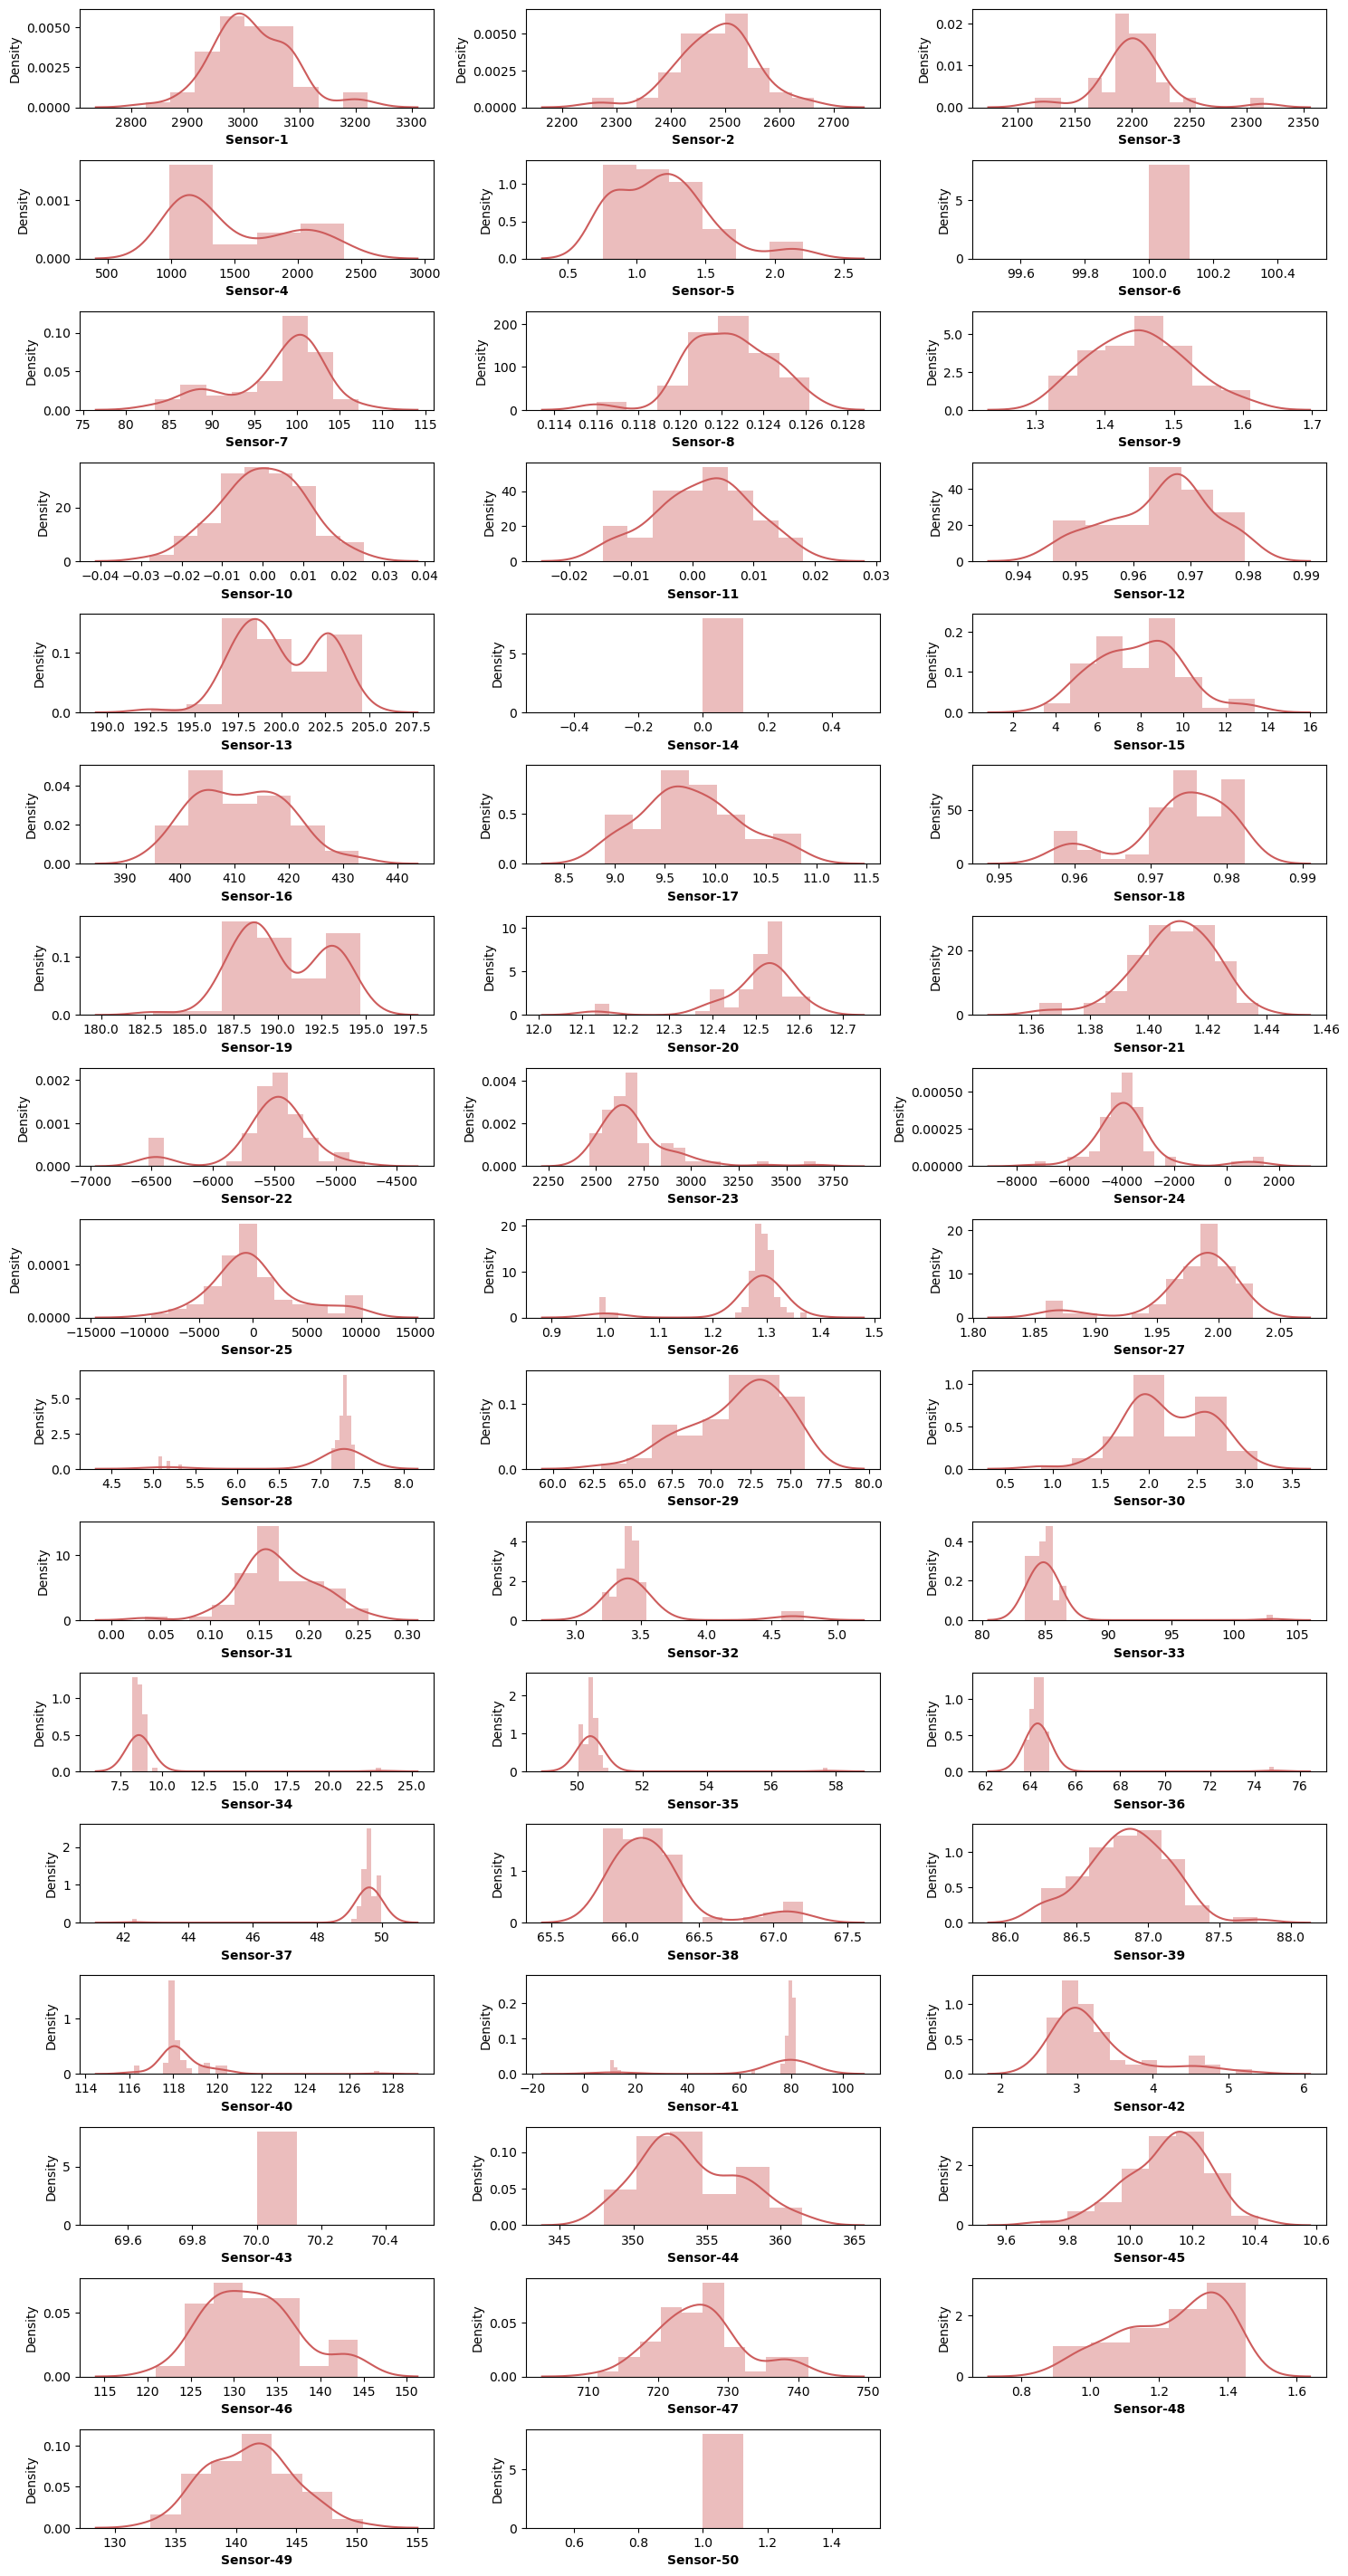

In [19]:
plt.figure(figsize=(15,100))

for i,cols in enumerate(train_df.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=train_df[cols] , color='indianred')
    plt.xlabel(cols , weight='bold')
    plt.tight_layout()

In [20]:
random_50_sensors = []
for i in range(50):
    if i not in random_50_sensors:
        random_50_sensors.append(np.random.randint(1,591))

print(random_50_sensors)

[18, 235, 62, 269, 169, 249, 50, 175, 209, 328, 250, 15, 199, 170, 224, 137, 378, 101, 247, 121, 206, 574, 148, 383, 466, 237, 300, 129, 368, 397, 165, 220, 362, 113, 397, 459, 31, 297, 220, 145, 568, 91, 383, 560, 464, 187, 514, 137]


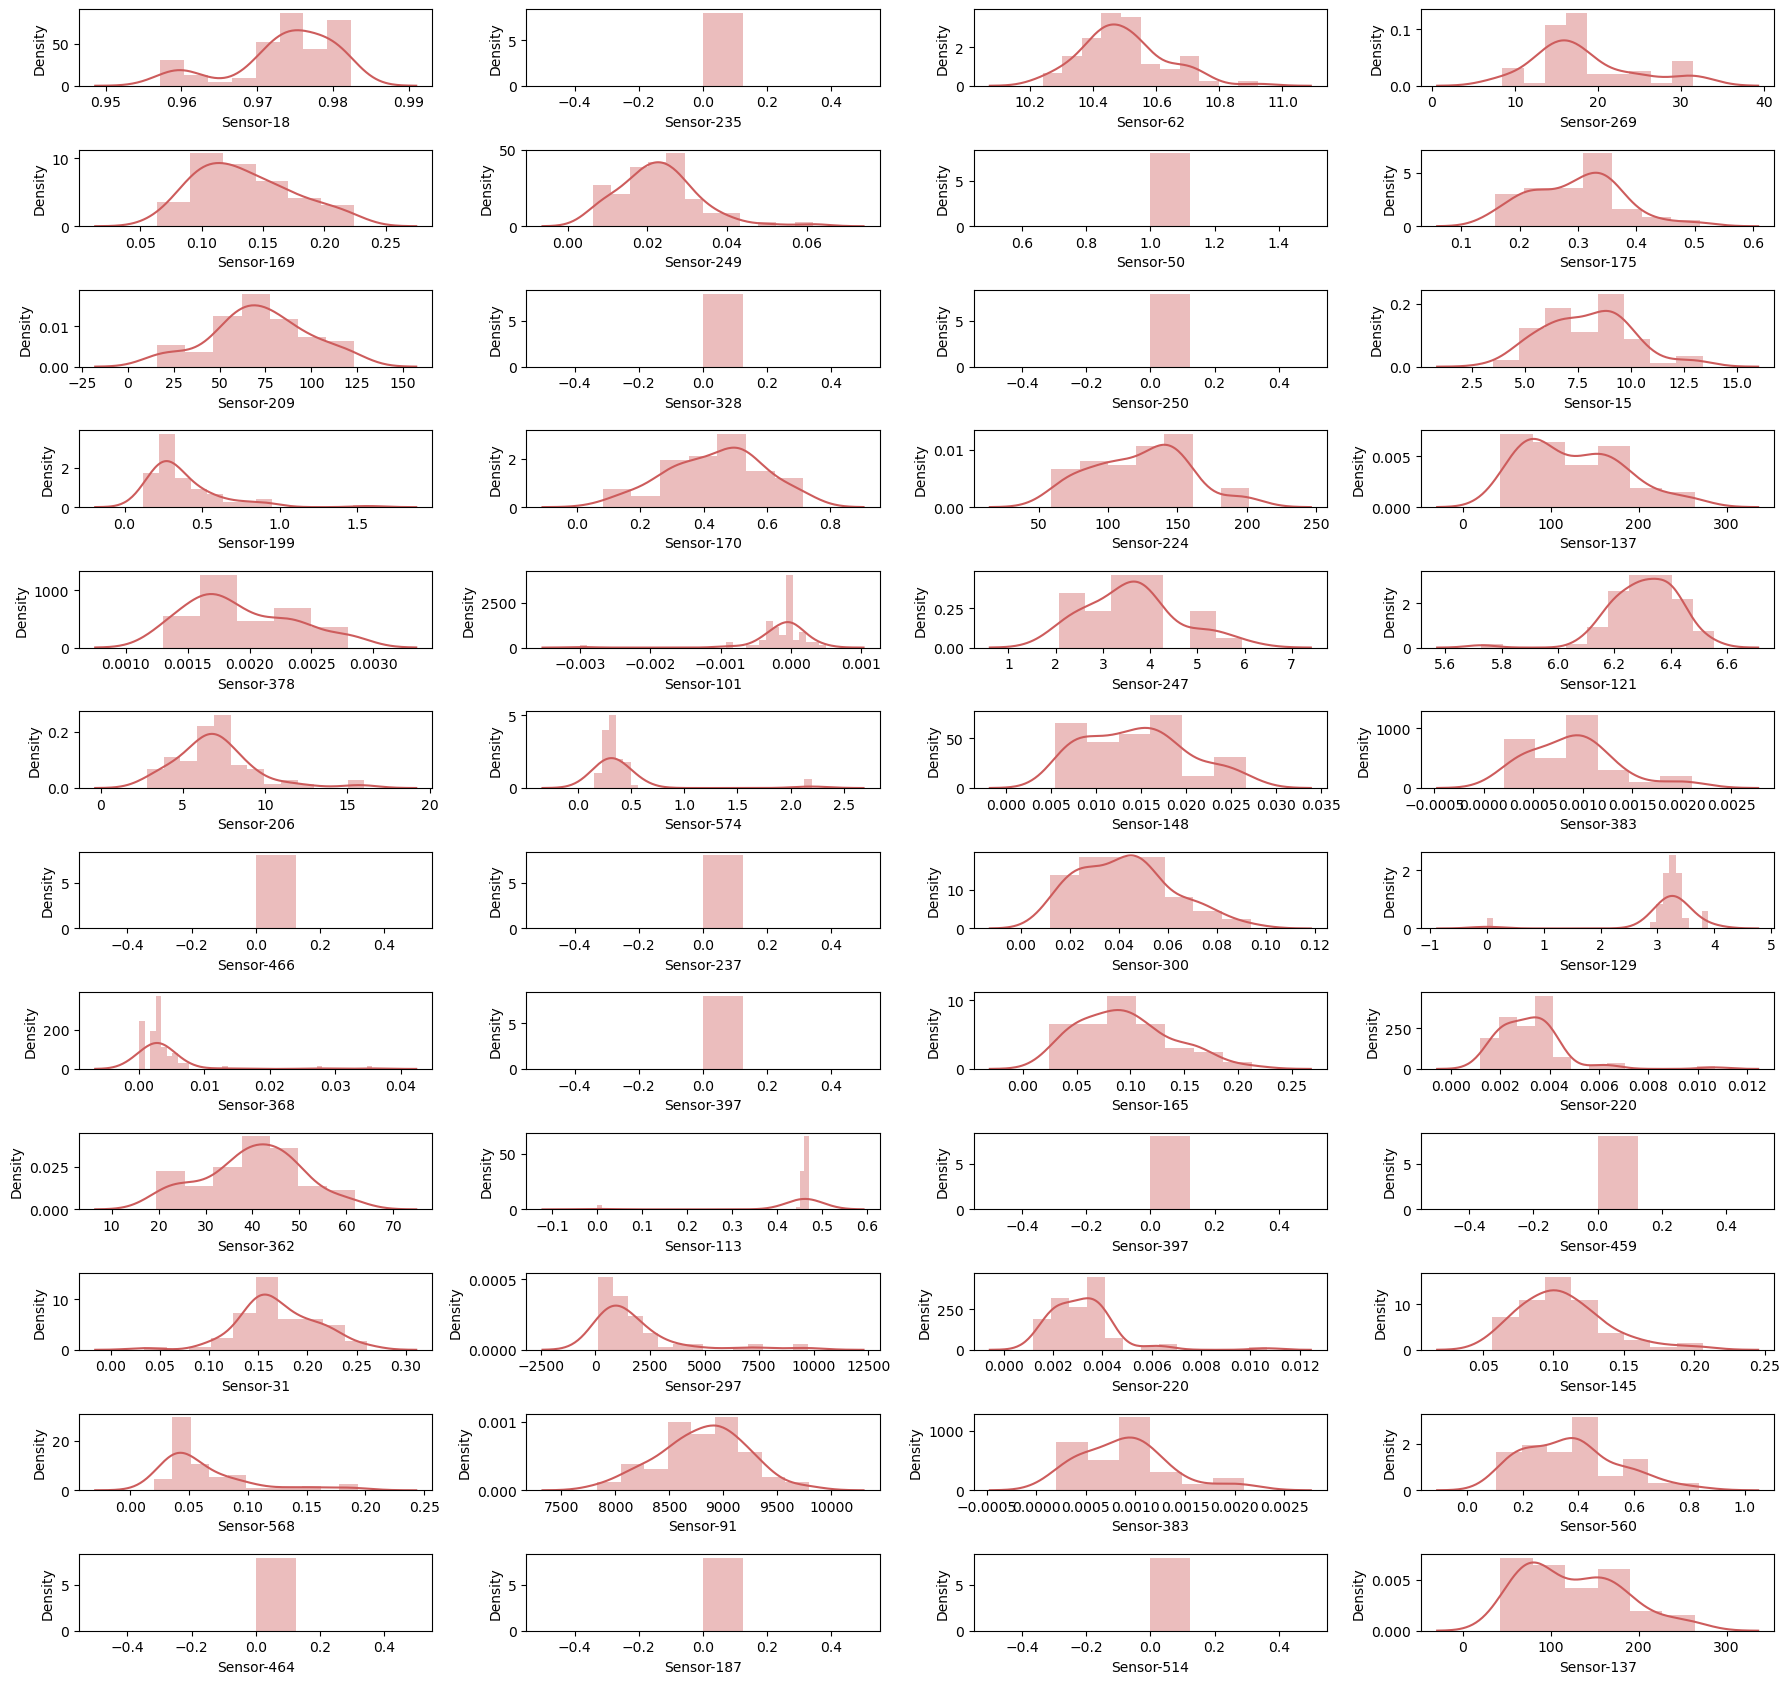

In [21]:
plt.figure(figsize=(18,105))
for i,cols in enumerate(train_df.columns[random_50_sensors]):
    plt.subplot(75,4,i+1)
    sns.distplot(x=train_df[cols], color='indianred')
    plt.xlabel(cols,weight=True)
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [22]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    cols_to_drop=[]
    num_cols = [cols for cols in df.columns if df[cols].dtype !='O']
    for cols in num_cols:
        if df[cols].std() == 0:
            cols_to_drop.append(cols)

    return cols_to_drop
    
def get_reduntant_cols(df : pd.DataFrame , missing_threadhold = .7):
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios> missing_threadhold].index)
    return cols_to_drop

In [23]:
cols_to_drop1 = get_reduntant_cols(df=df )
cols_to_drop1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [24]:

cols_to_drop2 = get_cols_with_zero_std_dev(df=train_df)

cols_to_drop2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-115',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-250',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Se

In [25]:
## Cols to drop

cols_to_drop = cols_to_drop1 + cols_to_drop2

**=>** Features that are not gonna contribute to ML algorithm in anyway, whatsoever.

## # Separate Features and Labels out:

In [26]:
X, y  = train_df.drop(cols_to_drop , axis =1) , train_df[['Good/Bad']]

In [27]:
X.columns.value_counts().sum()

462

In [28]:
X.head()

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
38,Wafer-839,3043.78,2522.76,2192.0000,2085.6871,1.1723,94.9300,0.1238,1.4463,-0.0031,...,NaN,0.5032,0.0149,0.0038,2.9656,0.0473,0.0280,0.0087,59.0825,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
48,Wafer-849,3030.23,2568.32,2196.0000,1230.0293,0.7684,97.5578,0.1219,1.4411,0.0096,...,NaN,0.4981,0.0136,0.0034,2.7329,0.0147,0.0095,0.0028,65.0365,-1
73,Wafer-874,2825.67,2286.09,2210.2778,2120.5760,1.0700,95.1089,0.1230,1.3947,0.0075,...,NaN,0.4974,0.0171,0.0049,3.4382,0.0218,0.0054,0.0020,24.6547,-1
77,Wafer-878,3086.05,2417.34,2216.5000,1111.5436,0.8373,99.9867,0.1205,1.4678,0.0024,...,101.3876,0.5007,0.0099,0.0027,1.9719,0.0187,0.0190,0.0053,101.3876,-1


In [29]:
df.shape[1] - X.columns.value_counts().sum()

130

In [30]:
len(cols_to_drop)

130

In [31]:
type(cols_to_drop)

list

In [32]:
train_df.columns

Index(['Wafers', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5',
       'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [33]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (73, 462)


,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
38,Wafer-839,3043.78,2522.76,2192.0000,2085.6871,1.1723,94.9300,0.1238,1.4463,-0.0031,...,NaN,0.5032,0.0149,0.0038,2.9656,0.0473,0.0280,0.0087,59.0825,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
48,Wafer-849,3030.23,2568.32,2196.0000,1230.0293,0.7684,97.5578,0.1219,1.4411,0.0096,...,NaN,0.4981,0.0136,0.0034,2.7329,0.0147,0.0095,0.0028,65.0365,-1
73,Wafer-874,2825.67,2286.09,2210.2778,2120.5760,1.0700,95.1089,0.1230,1.3947,0.0075,...,NaN,0.4974,0.0171,0.0049,3.4382,0.0218,0.0054,0.0020,24.6547,-1
77,Wafer-878,3086.05,2417.34,2216.5000,1111.5436,0.8373,99.9867,0.1205,1.4678,0.0024,...,101.3876,0.5007,0.0099,0.0027,1.9719,0.0187,0.0190,0.0053,101.3876,-1


**=>** Now, we have 462 contributing features. 

In [34]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (73, 1)


,Good/Bad
38,-1
1,1
48,-1
73,-1
77,-1


In [35]:
X['Wafers']= X['Wafers'].str.replace('Wafer-' , "")

In [36]:
X.head()

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
38,839,3043.78,2522.76,2192.0000,2085.6871,1.1723,94.9300,0.1238,1.4463,-0.0031,...,NaN,0.5032,0.0149,0.0038,2.9656,0.0473,0.0280,0.0087,59.0825,-1
1,802,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
48,849,3030.23,2568.32,2196.0000,1230.0293,0.7684,97.5578,0.1219,1.4411,0.0096,...,NaN,0.4981,0.0136,0.0034,2.7329,0.0147,0.0095,0.0028,65.0365,-1
73,874,2825.67,2286.09,2210.2778,2120.5760,1.0700,95.1089,0.1230,1.3947,0.0075,...,NaN,0.4974,0.0171,0.0049,3.4382,0.0218,0.0054,0.0020,24.6547,-1
77,878,3086.05,2417.34,2216.5000,1111.5436,0.8373,99.9867,0.1205,1.4678,0.0024,...,101.3876,0.5007,0.0099,0.0027,1.9719,0.0187,0.0190,0.0053,101.3876,-1


## # Data Transformation:

In [37]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler

imputer = KNNImputer(n_neighbors=3, weights='distance')
scaler = RobustScaler()
preprocessing_pipeline = Pipeline(
    steps = [
        ('imputer' , imputer) , ('scaler', scaler)
    ]
)
preprocessing_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='distance')),
                ('scaler', RobustScaler())])

In [38]:
## Transform features 

X_trans = preprocessing_pipeline.fit_transform(X.values)
print('shape of transformed features is :', X_trans.shape)
X_trans

shape of transformed features is : (73, 462)


array([[-0.18367347,  0.40524691,  0.35118636, ...,  1.65517241,
         0.        ,  0.        ],
       [-0.93877551, -0.44598765,  0.16309606, ...,  0.55172414,
        -0.37418491,  2.        ],
       [ 0.02040816,  0.26584362,  0.87595024, ..., -0.37931034,
         0.08807692,  0.        ],
       ...,
       [ 0.42857143, -0.57921811, -0.14075098, ..., -0.48275862,
        -0.57357101,  0.        ],
       [-0.69387755,  0.30977366, -0.70168164, ..., -0.06896552,
        -0.16714941,  0.        ],
       [-0.30612245, -0.22397119, -0.20029947, ..., -0.24137931,
        -0.1330429 ,  0.        ]])

## # I will cluster "Wafers" instances?

Let's see whether clustering of data instances do me any good. 

In [39]:
%pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e